# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their GitHub repository(https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).
#### Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

The data has several columns, including the following:
- RespondentID — An anonymized ID for the respondent (person taking the survey)
- Gender — the respondent's gender
- Age — the respondent's age
- Household Income — the respondent's income
- Education — the respondent's education level
- Location (Census Region) — the respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning Data
The two columns, which is;
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. 

In [4]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] =\
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

- Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

#### Renaming the columns
Rename each of the columns above so the names are more intuitive. We recommend using seen_1 to indicate whether the respondent saw Star Wars: Episode I The Phantom Menace, seen_2 for Star Wars: Episode II Attack of the Clones, and so on.

In [5]:
mapping = {}
for i, col in enumerate(star_wars.columns[3:9]):
    mapping[col] = 'seen_' + str(i+1)

star_wars.rename(columns=mapping, inplace=True)

#### Converting values
Convert each column above so that it only contains the values True and False.

In [6]:
for i in range(6):
    print(star_wars.iloc[:, i+3].value_counts(dropna=False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_5, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen_6, dtype: int64


There are only 2 values in each column; 'Star Wars: Episode X ...' or 'NaN'. Therefore, I can think them as 'NaN' or a string.

In [7]:
for i in range(6):
    for l, ele in enumerate(star_wars.iloc[:, i+3]):
        if pd.isna(ele):
            star_wars.iloc[l, i+3] = False
        else:
            star_wars.iloc[l, i+3] = True

for i in range(6):
    print(star_wars.iloc[:, i+3].value_counts(dropna=False))

True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64
True     738
False    448
Name: seen_6, dtype: int64


The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 — How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 — How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 — How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 — How much the respondent liked Star Wars: Episode VI Return of the Jedi

#### Converting each column to a numeric type

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#### Renaming the columns
In order to tell what they represent more easily.

In [9]:
mapping = {}
for i, col in enumerate(star_wars.columns[9:15]):
    mapping[col] = 'ranking_' + str(i+1)

star_wars.rename(columns=mapping, inplace=True)

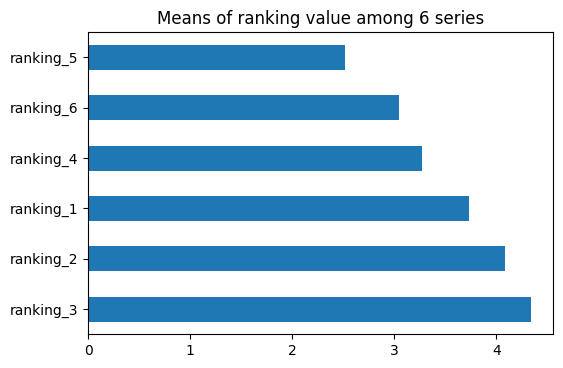

In [10]:
ranking_means = star_wars.iloc[:, 9:15].mean()
ranking_means.sort_values(ascending=False).plot.barh(title='Means of ranking value among 6 series')

The highest rated 'Star Wars' movie is the 5th one, and the lowest is the 3rd one.

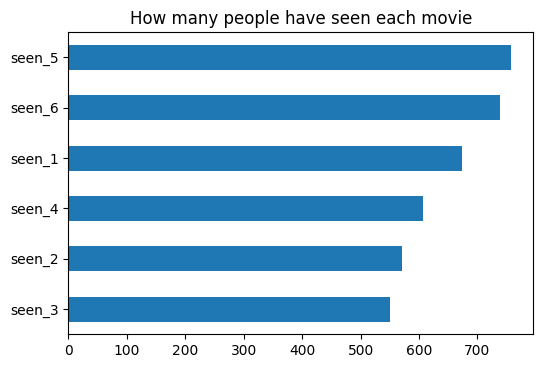

In [11]:
seen_sum = star_wars.iloc[:, 3:9].sum()
seen_sum.sort_values().plot.barh(title='How many people have seen each movie')

The most popular 'Star Wars' movie is the 5th one, and the least is the 3rd one.

#### How certain segments of the survey population responded
There are several columns that segment our data into two groups. Here are a few examples:
- Do you consider yourself to be a fan of the Star Wars film franchise? — True or False
- Do you consider yourself to be a fan of the Star Trek franchise? — Yes or No
- Gender — Male or Female

In [12]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

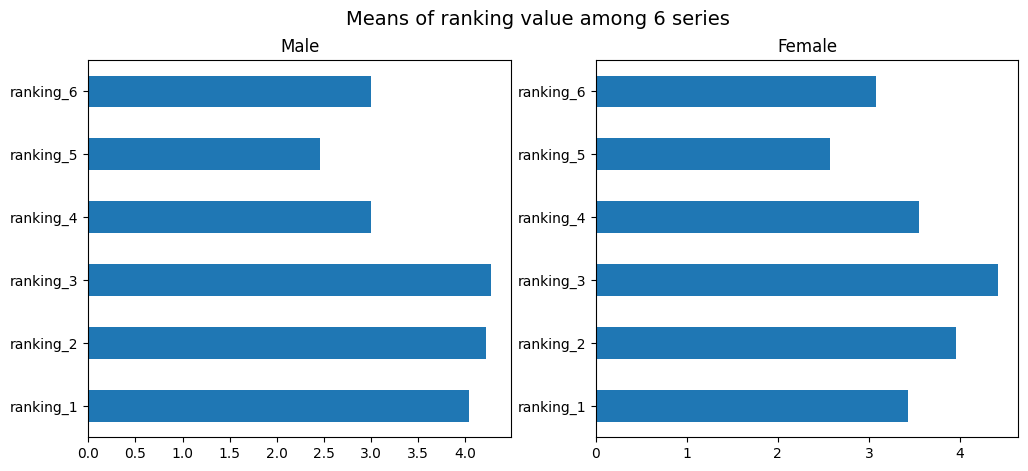

In [32]:
ranking_means_males = males.iloc[:, 9:15].mean()
ranking_means_females = females.iloc[:, 9:15].mean()

fig = plt.figure(figsize=(12,5))
fig.suptitle('Means of ranking value among 6 series', size=14)
plt.subplot(1,2,1, title='Male')
ranking_means_males.plot.barh()
plt.subplot(1,2,2, title='Female')
ranking_means_females.plot.barh()
plt.show()

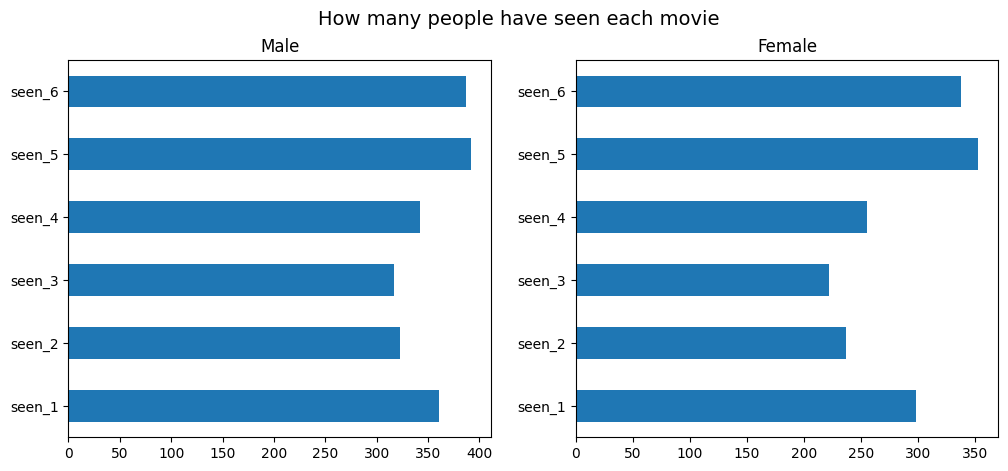

In [33]:
seen_sum_males = males.iloc[:, 3:9].sum()
seen_sum_females = females.iloc[:, 3:9].sum()

fig = plt.figure(figsize=(12,5))
fig.suptitle('How many people have seen each movie', size=14)
plt.subplot(1,2,1, title='Male')
seen_sum_males.plot.barh()
plt.subplot(1,2,2, title='Female')
seen_sum_females.plot.barh()
plt.show()

Male tend to watch every series uniformly comparing to female. The 5th episode is the most popular and highest rated one among males and females. The 1st episode is highly rated by females comparing to males.